In [195]:
#!python prediction_mask.py

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import glob
import helper

In [190]:

loss_file = open("predictions/pred_loss_HR.txt")

filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

val_file = "predictions/inputs_testHR29.npy"
pred_file = "predictions/pred_testHR29.npy"
label_file = "predictions/labels_testHR29.npy"

val_images = np.load(val_file)
pred_images = np.load(pred_file)
val_label = np.load(label_file)
pred_images[0,0,:,:,:].shape

(1, 512, 512)

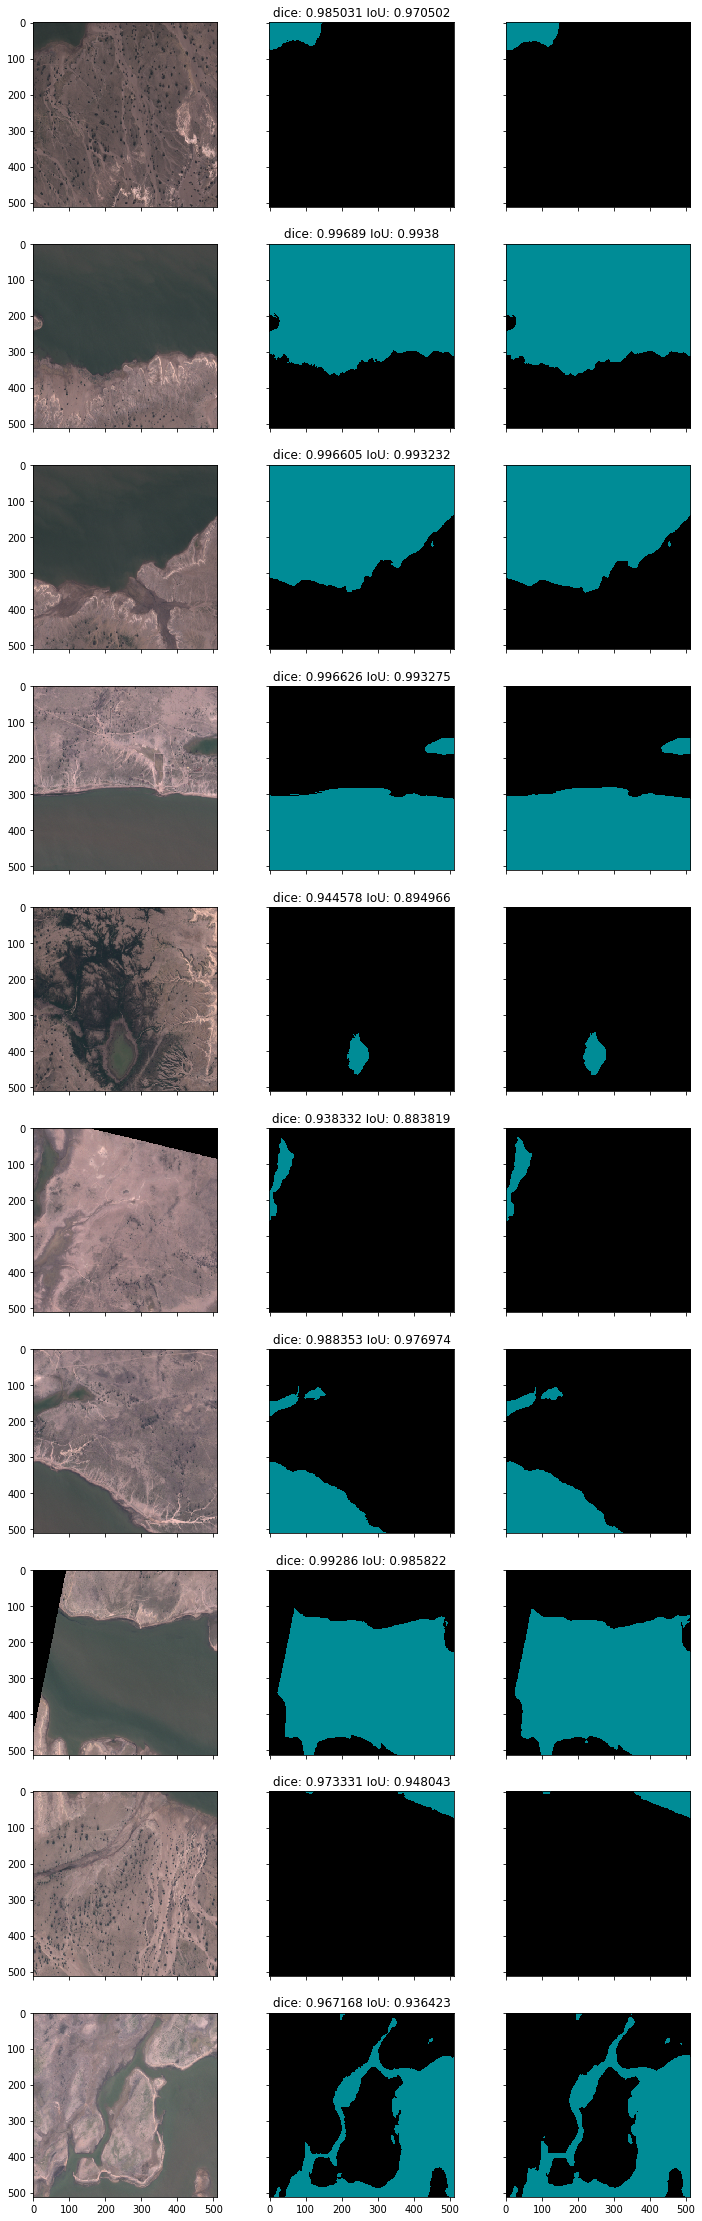

In [191]:
input_images_rgb = [helper.reverse_transform(x) for x in val_images[:10,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:10,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:10,0,:,:,:]]
#print(np.shape(input_images_rgb))
#print(len([input_images_rgb, target_masks_rgb, pred_rgb]))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb],filedata,save=1)

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Validation data

###  Metrics Val


#!python prediction_mask.py  # no unlb online test the metrics

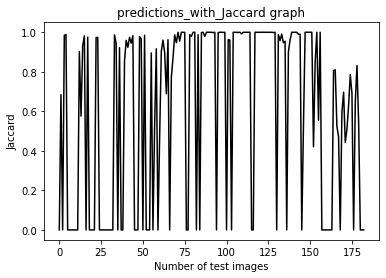

Ctd: 183 Jaccard:  0.6118731092896175


In [9]:
loss_file = open("predictions/pred_loss_HR_val.txt")

f = plt.figure()
filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("jaccard"):
        i = i.split(" ")
        loss.append(float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Jaccard")
plt.title("predictions_with_Jaccard graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_HR_Jaccard.pdf", bbox_inches='tight')

print('Ctd:',len(loss),'Jaccard: ',np.mean(loss))

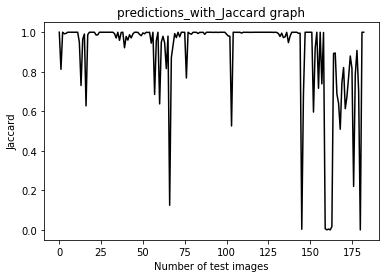

Ctd: 183 Jaccard:  0.9058538633879781


In [8]:
loss_file = open("predictions/pred_loss_HR_val.txt")

f = plt.figure()
filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")
loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("dice"):
        i = i.split(" ")
        loss.append(float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Dice")
plt.title("predictions_with_Dice graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_loss_dice.pdf", bbox_inches='tight')

print('Ctd:',len(loss),'Dice: ',np.mean(loss))

### Plot Val

In [192]:
loss_file = open("predictions/pred_loss_HR_val.txt")

filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

val_file = "predictions/inputs_testHR183.npy"
pred_file = "predictions/pred_testHR183.npy"
label_file = "predictions/labels_testHR183.npy"

val_images = np.load(val_file)
pred_images = np.load(pred_file)
val_label = np.load(label_file)
pred_images[0,0,:,:,:].shape


(1, 512, 512)

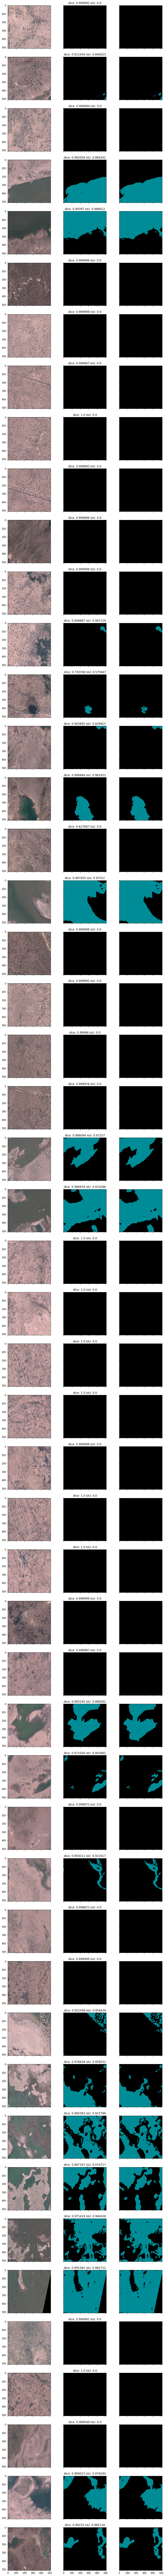

In [194]:
input_images_rgb = [helper.reverse_transform(x) for x in val_images[:50,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:50,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:50,0,:,:,:]]
#print(np.shape(input_images_rgb))
#print(len([input_images_rgb, target_masks_rgb, pred_rgb]))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb],filedata)

## Prediction in LR upscale + model HR


In [79]:
!python LR_prediction.py

/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
bce: 24.705364, dice: 0.653045, loss: 12.526159, jaccard: 0.484829
1
bce: 0.096831, dice: 0.988451, loss: 0.054190, jaccard: 0.977166
2
bce: 0.017465, dice: 0.998767, loss: 0.009349, jaccard: 0.997537
3
bce: 3.537485, dice: 0.252430, loss: 2.142527, jaccard: 0.144434
4
bce: 16.368160, dice: 0.206090, loss: 8.581036, jaccard: 0.114881
5
bce: 0.000000, dice: 1.000000, loss: 0.000000, jaccard: 1.000000
6
bce: 20.694756, dice: 0.000005, loss: 10.847376, jaccard: 0.000000
7
bce: 1.279111, dice: 0.750461, loss: 0.764325, jaccard: 0.600584
8
bce: 17.244659, dice: 0.000006, loss: 9.122327, jaccard: 0.000000
9
bce: 

In [80]:
#with normalization with the normalization of HR but with the value_max = np.max(img) no sale correcto


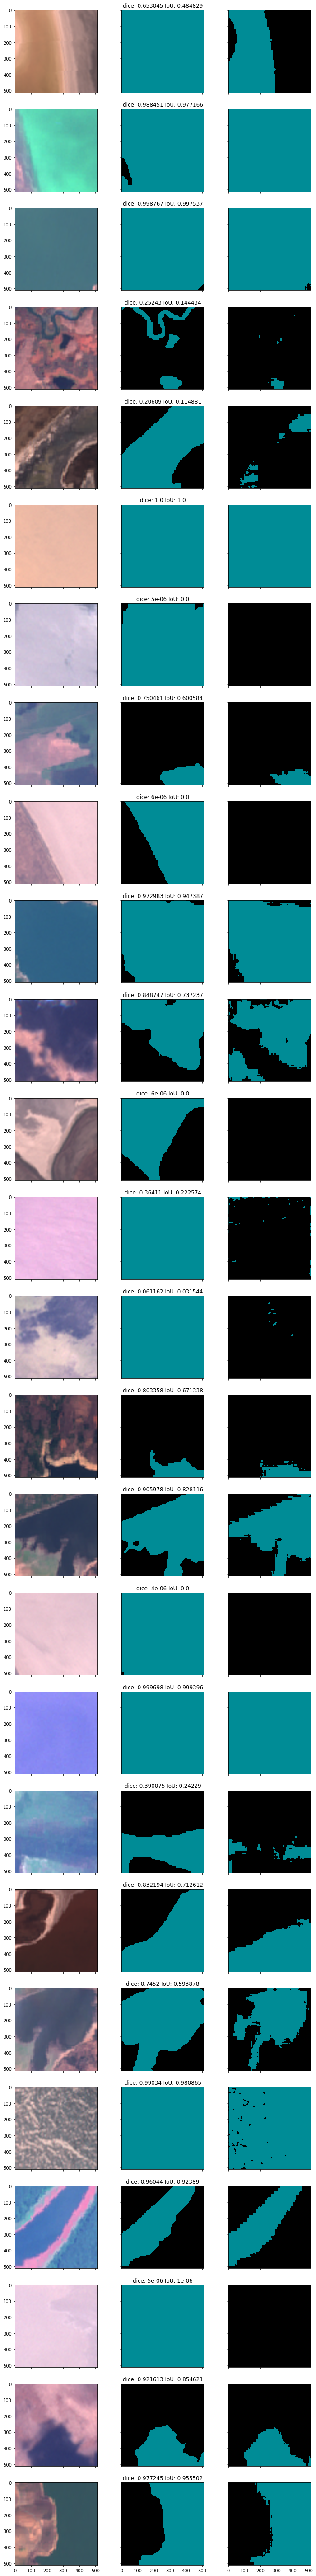

In [81]:
#with normalization with LR values and max value LR dtaset ---upsample all 512x512
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import glob
import helper 
loss_file = open("predictions/pred_loss_LR.txt")

filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

val_file = "predictions/inputs_testLR26.npy"
pred_file = "predictions/pred_testLR26.npy"
label_file = "predictions/labels_testLR26.npy"

val_images = np.load(val_file)
pred_images = np.load(pred_file)
val_label = np.load(label_file)
pred_images[0,0,:,:,:].shape
input_images_rgb = [helper.reverse_transform(x) for x in val_images[:,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:,0,:,:,:]]
#print(np.shape(input_images_rgb))
#print(len([input_images_rgb, target_masks_rgb, pred_rgb]))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb],filedata)